**Machine Learning Steps**

1. Feed input. Data flows from layer to layer. Retrieve output. (Cung cấp dữ liệu đầu vào cho mạng NN . Dữ liệu sẽ được di chuyển từ lớp này sang lớp khác cho đến khi nhận được output)

     y = network(x,w)

2. Calculate the error ( tính toán sai số giữ predict và label)
    
    VD: E = 1/2(y*-y)^2

3. Adjust the parameters using Gardient descent (Cập nhật các tham số bằng gardient descent)

    w = w - lr(dE/dw)

4. Start again(thực hiện lại)


-Các bước xem : Base layer-> lớp Dense -> Activation Layer -> các hàm kích hoạt-> Hàm LOSS-> Convolution layer -> Reshape


Cập nhập w:
w = w0 + lr*Loss



In [ ]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Tạo 1 cái layer mà nó phải phù hợp sao cho mà cái lớp layer này có thể là fully connected hoặc là kết nối nonfully connected
- Nhưng đơn giản dựa vào các input đầu vào mà layer này có thể đưa ra 1 output phù hợp(Forward Propagation - Lan truyền thuận)
- Backward Propagation là dùng để cập nhật các parameter

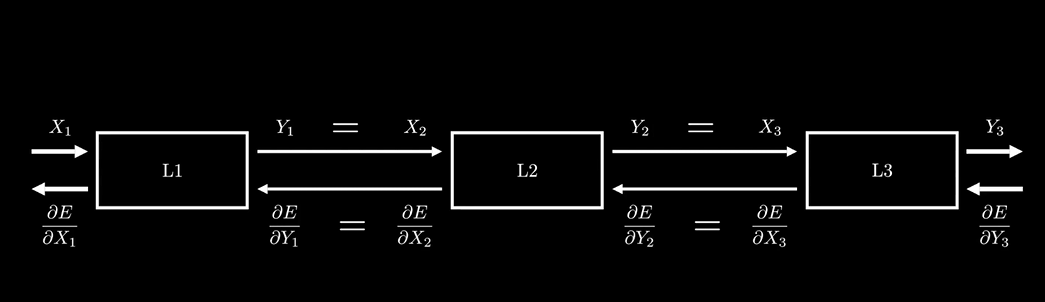

In [ ]:
#Khai báo 1 cái layer cơ bản(Base Layer) phải có
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        # TODO: return output
        pass

    def backward(self, output_gradient, learning_rate):
        # TODO: update parameters and return input gradient
        pass

- Hình ảnh về Dense layer
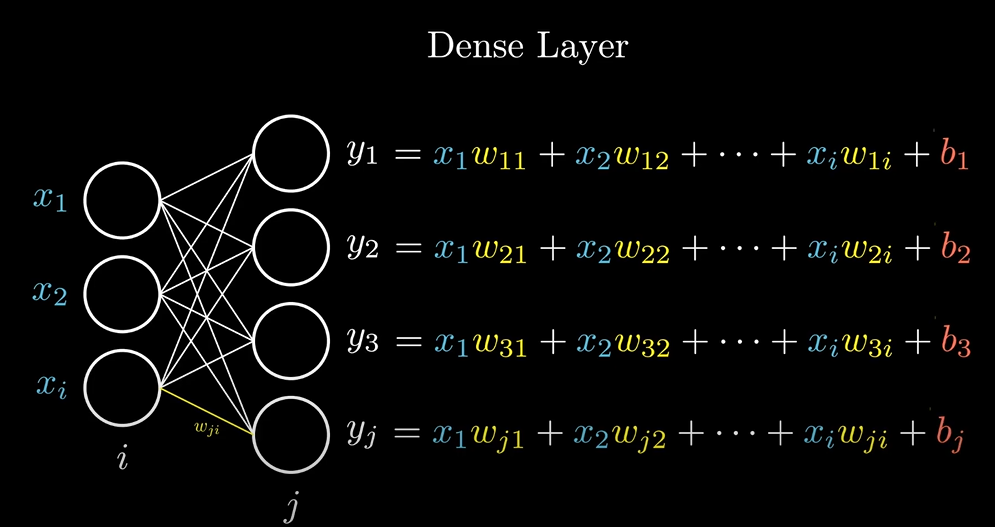

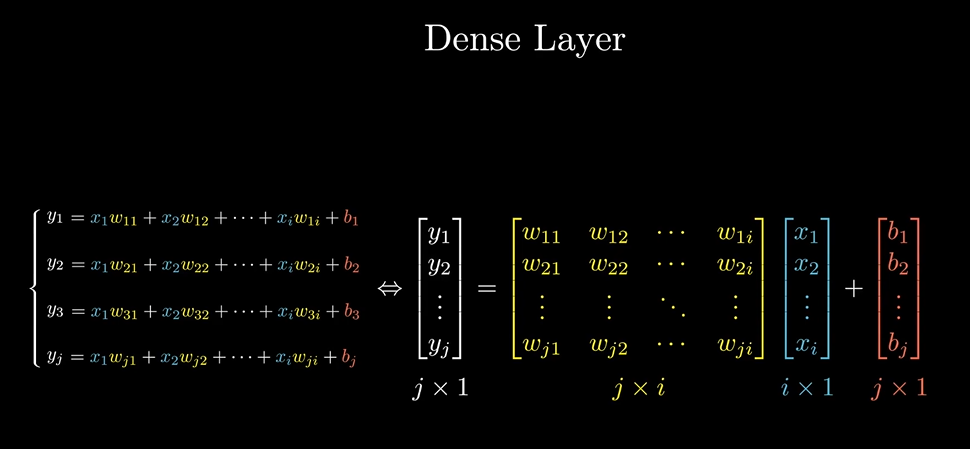
- Vd : Mình có được dE/dY thì mình cần tính 2 thứ sau
+ Cái dòng dầu tiên thì ta sẽ cập nhật các trọng số lại để đầu ra giống với label
+ cái dòng thứ 2 thì ta sẽ phải đạo hàm vì nó có thể là output của layer khác
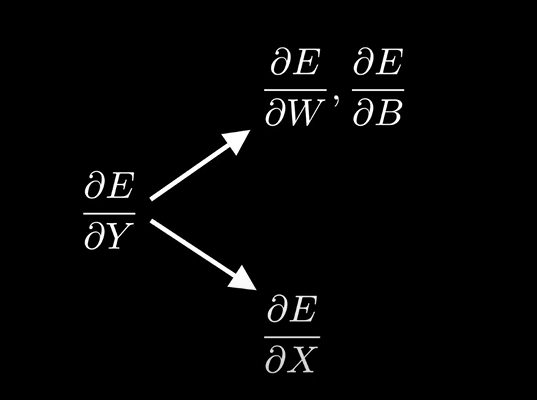

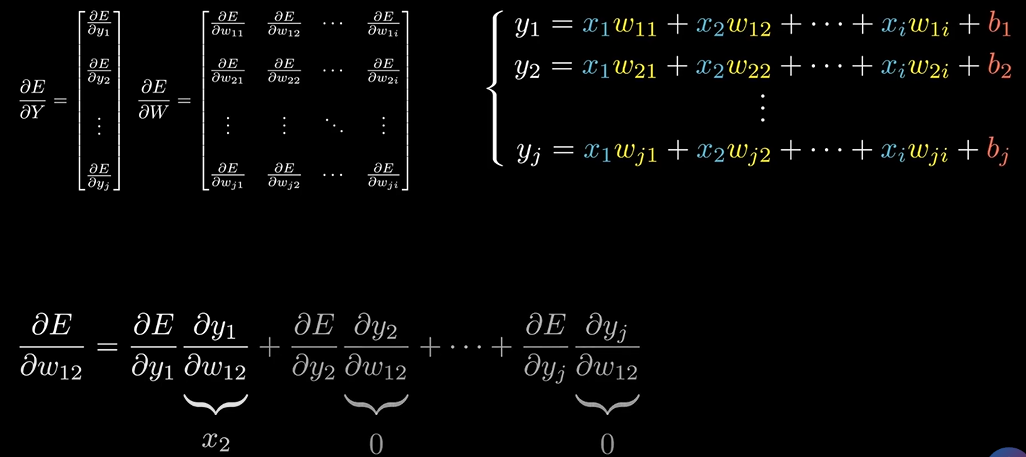

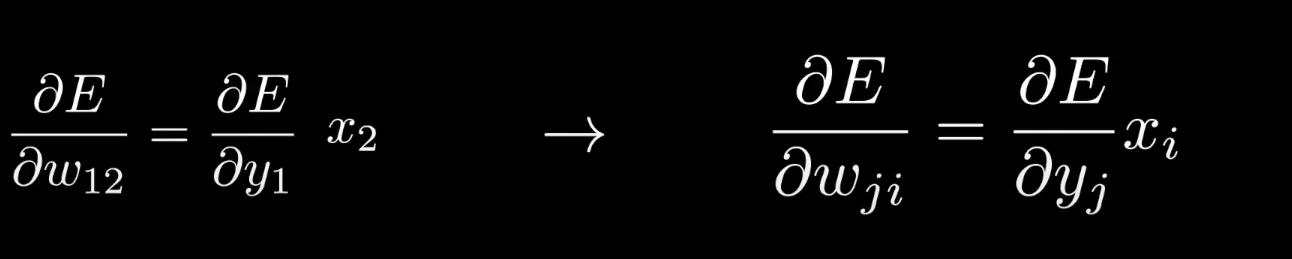

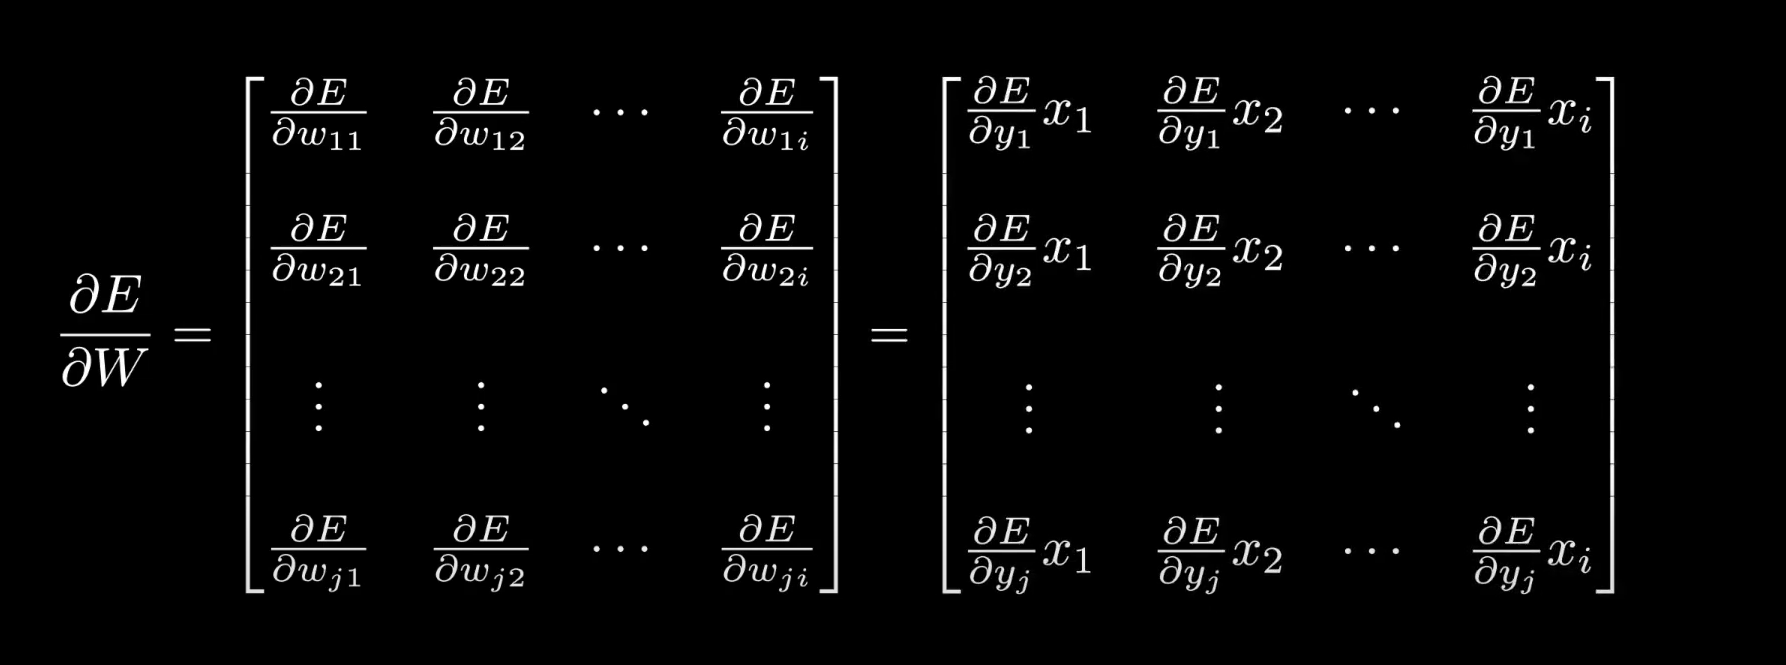

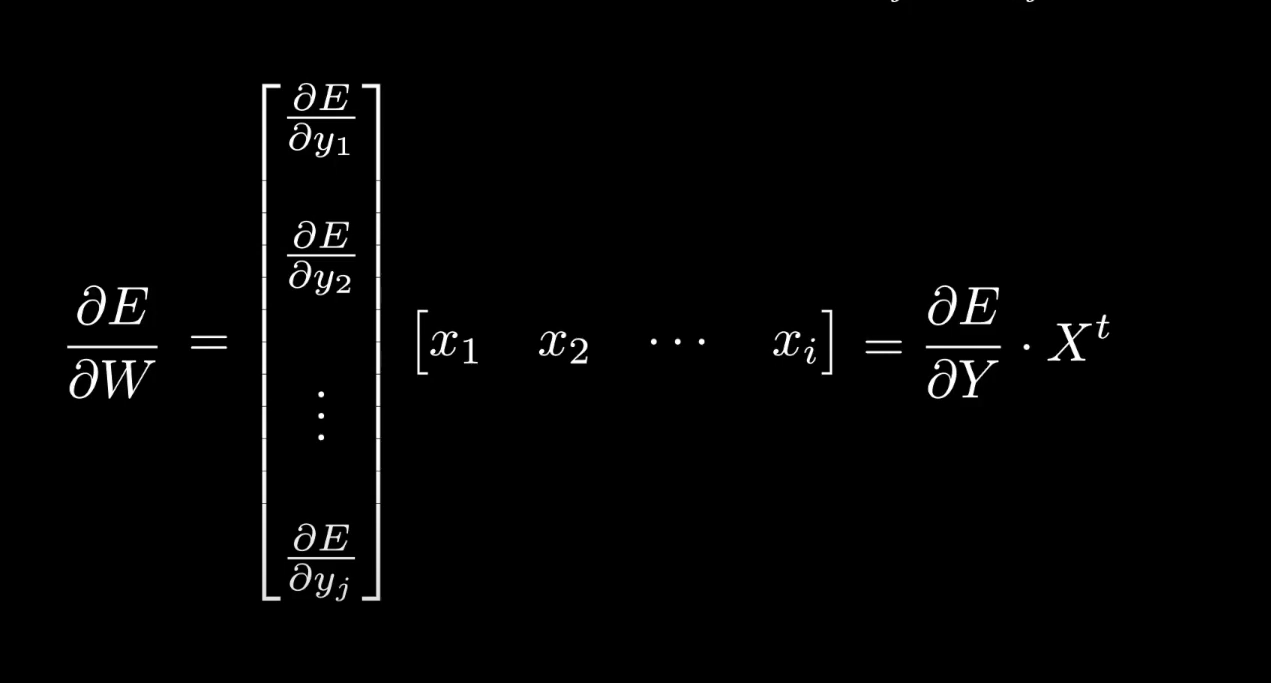

-Tính đạo hàm của LOSS so với các bias:
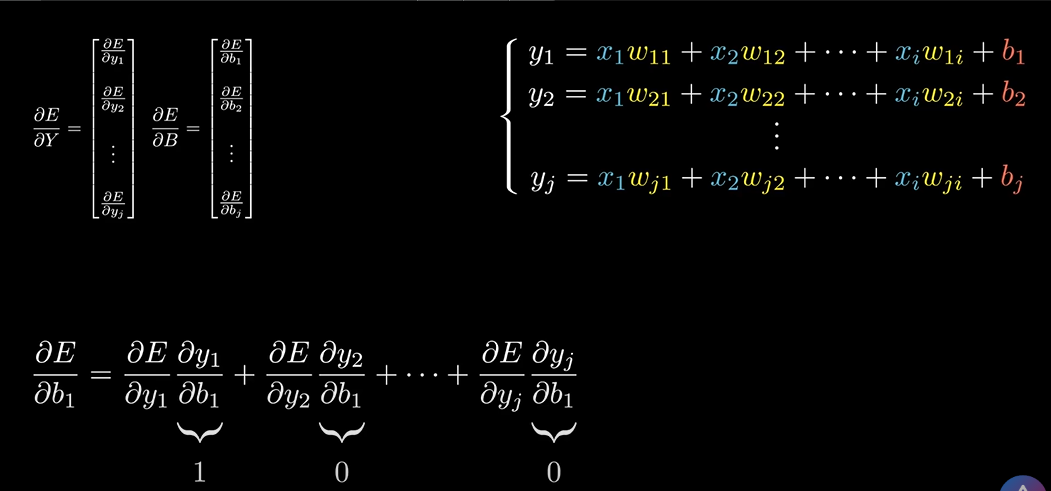
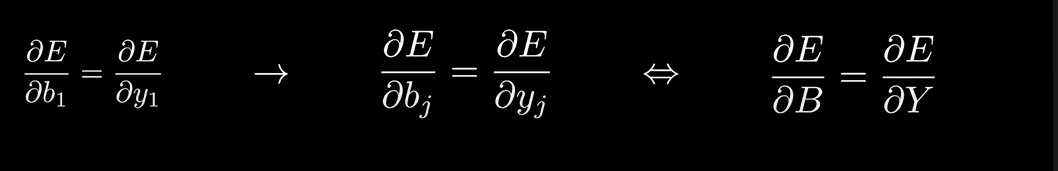
- Tính đạo hảm của error so với input đầu vào:
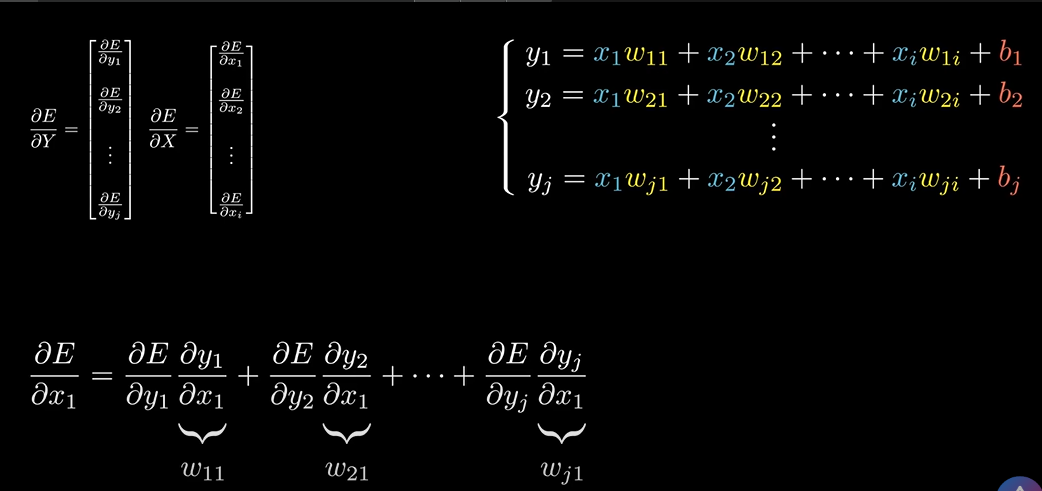
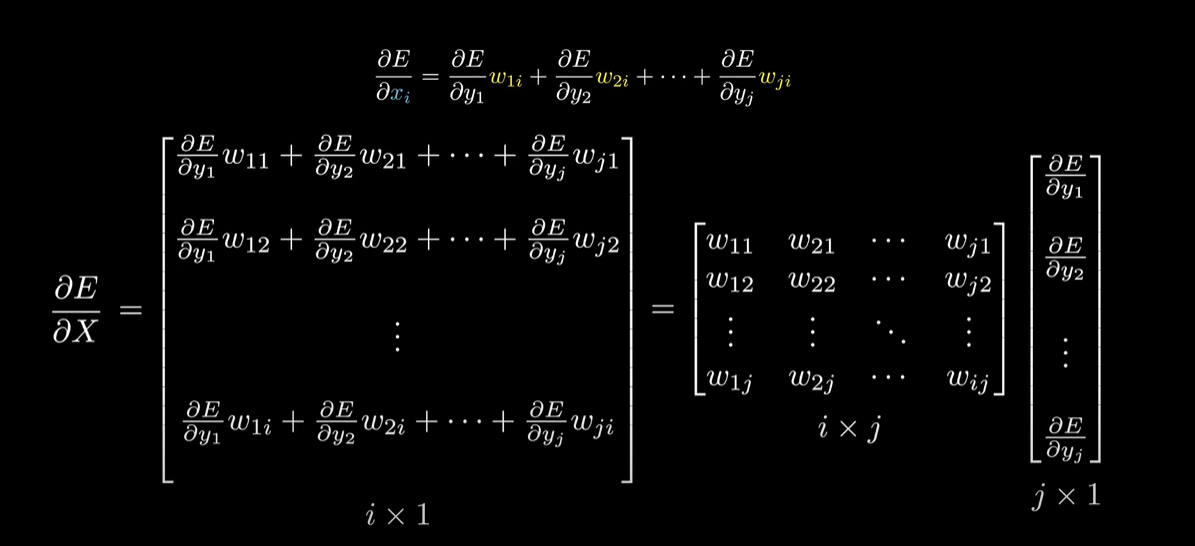
-Kết quả cho từng cái đạo hàm như sau:

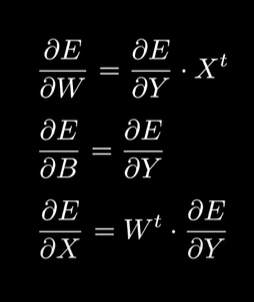

In [ ]:
#Này là lớp fully_connected layer nghĩa là node của layer trước được kết nối với tất cả các node ở layer sau
class Dense(Layer): #Dense dc kế thừa từ bas layer
    def __init__(self, input_size, output_size): # input_size là Số lượng neural ở đầu vào (VD kích thước bức ảnh là 28*28 thì inputsize   là 784 (với dense là lớp dầu tiên)) output_size là số lượng neural(node) đầu ra
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):   # x = x- lr*dE/dx (x là các trọng số cần cập nhật)
        weights_gradient = np.dot(output_gradient, self.input.T) #dE/dW
        input_gradient = np.dot(self.weights.T, output_gradient)  # dE/dX
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

Hàm kích hoạt có cấu trúc như sau kích thước của đầu vào sẽ y như đầu ra

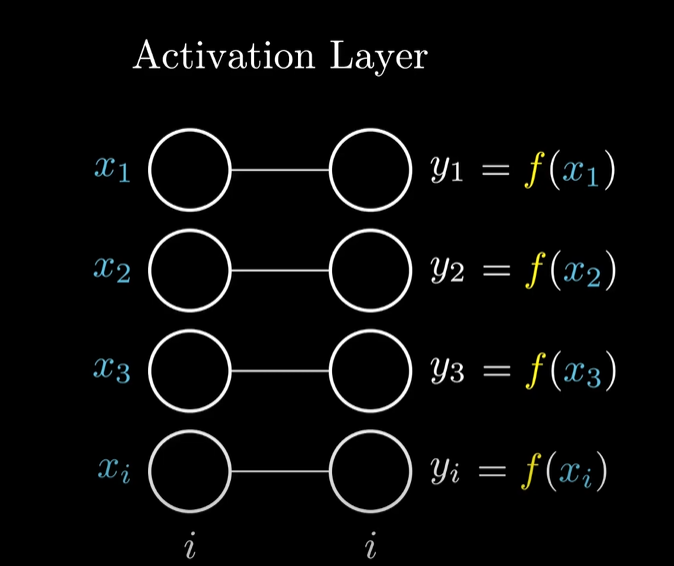
- Tính đạo hàm của dE/dX:
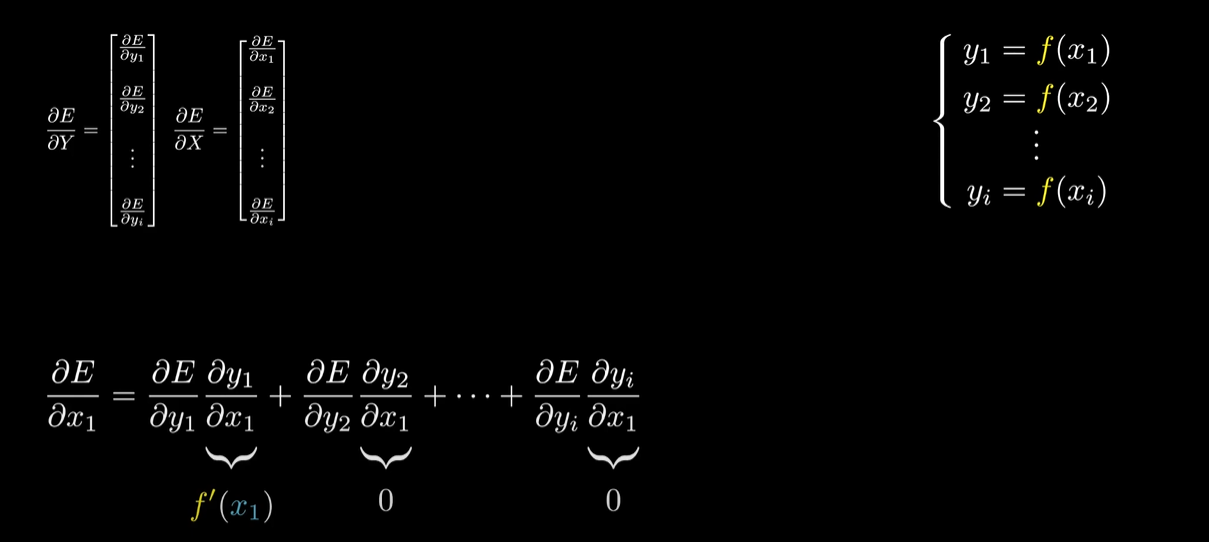
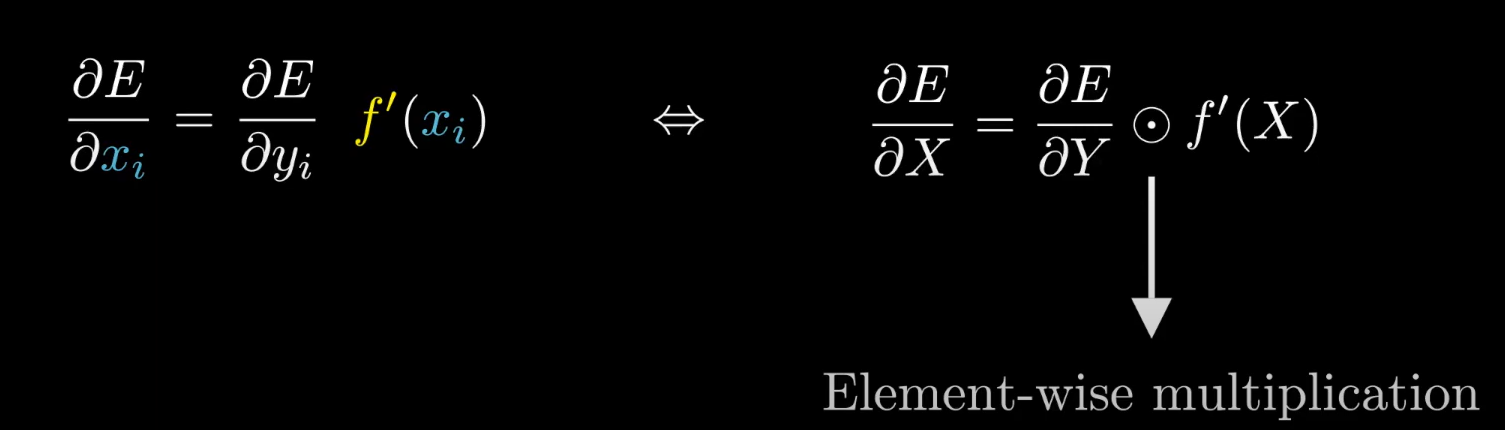

In [ ]:
#Lớp Activevation layer cũng dc kế thừa từ lớp layer cơ bản
class Activation(Layer):
    def __init__(self, activation, activation_prime): # Nhận 2 tham số là hàm kích hoạt và đạo hàm của nó
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

* Các hàm kích hoạt
- Màu xanh dương là hình dáng của hàm đó còn màu xanh lá là đạo hàm của nó
+ Tanh
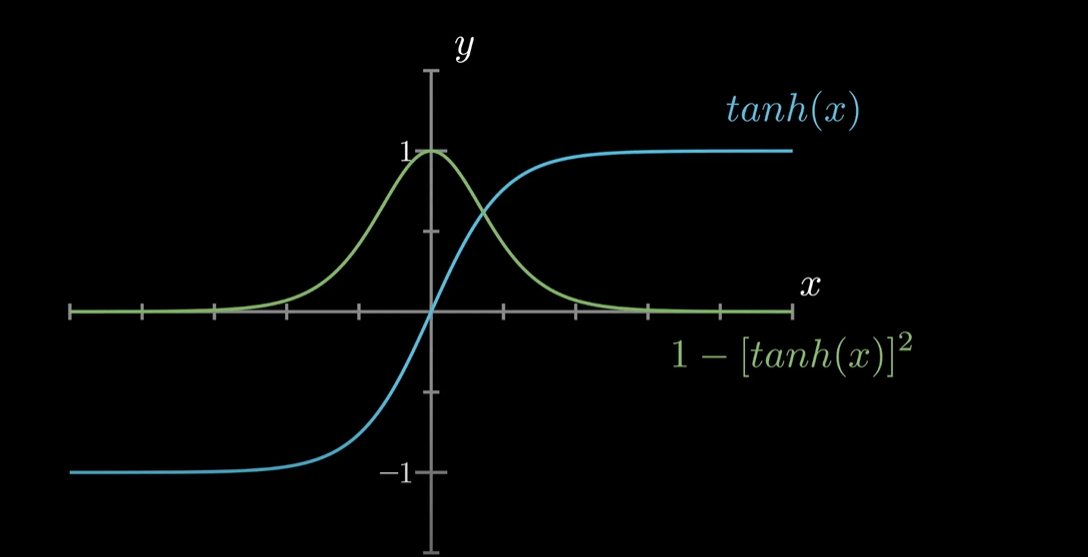
-Sigmoid:

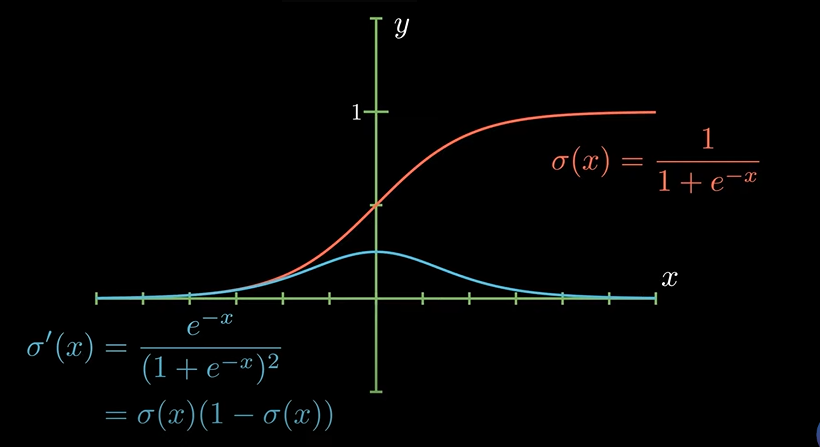


-Softmax:
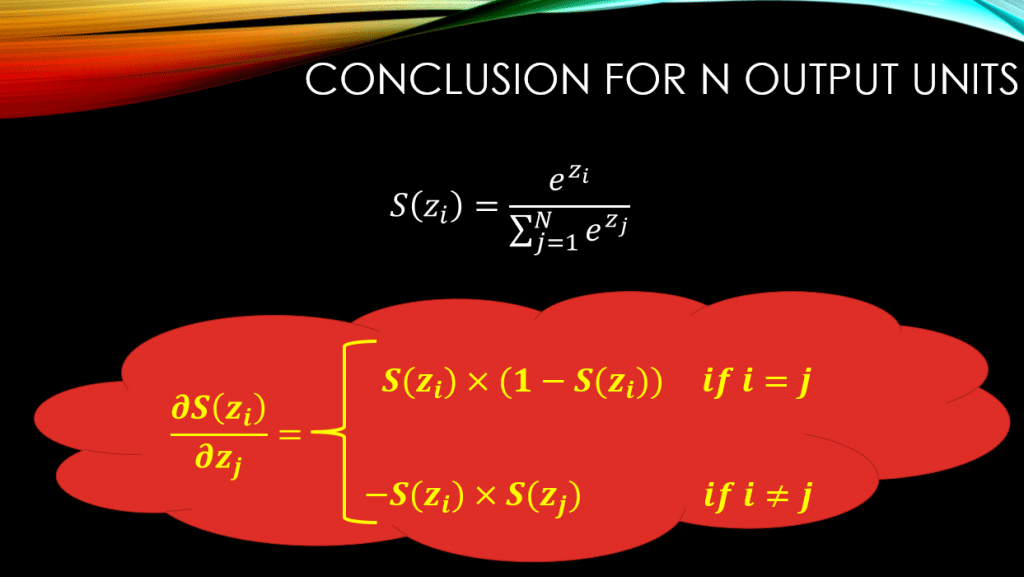

In [ ]:
#các hàm kích hoạt và đạo hàm của các hàm kích hoạt thuộc lớp Activation layer
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)

class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)

        super().__init__(sigmoid, sigmoid_prime)

class Softmax(Layer):
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_gradient, learning_rate):
        # This version is faster than the one presented in the video
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)
        # Original formula:
        # tmp = np.tile(self.output, n)
        # return np.dot(tmp * (np.identity(n) - np.transpose(tmp)), output_gradient)

Hàm MSE:
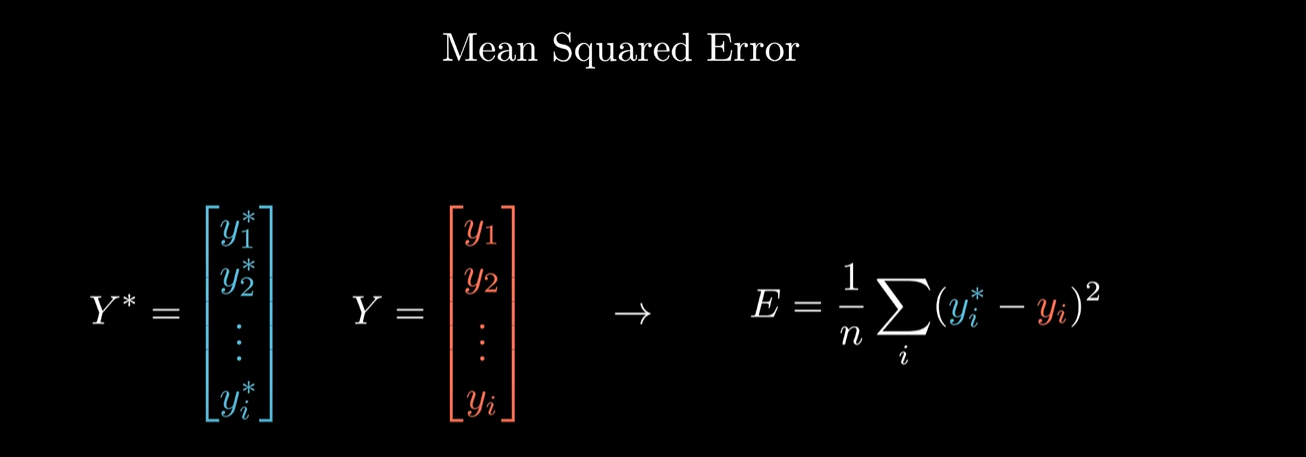
-Đạo hàm của MSE:
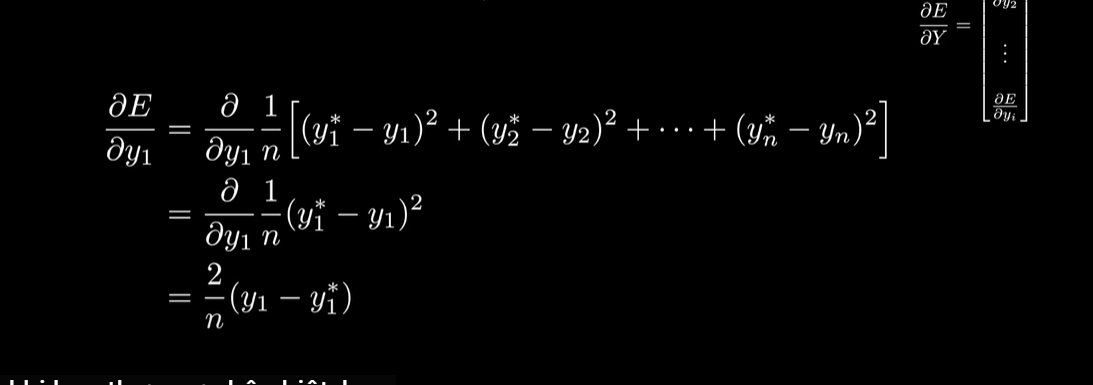

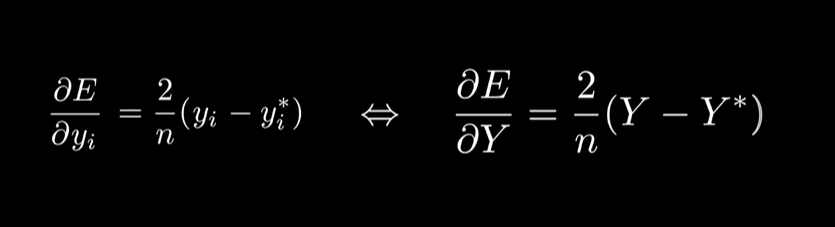

- Binary loss và MSE của nó:
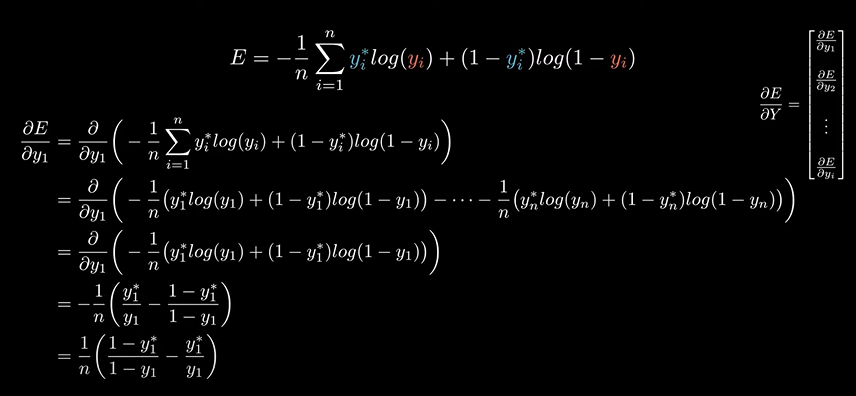
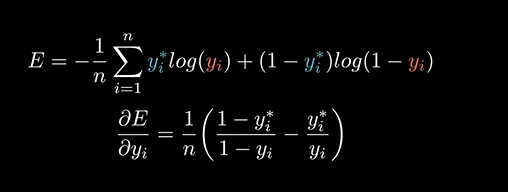

In [ ]:
#Cách hàm loss
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)
#Cách làm hàm mất mát binary ( dùng cho output là chỉ có 2 cái nhiều cái ko nên dùng)
def binary_cross_entropy(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

**Convolution layer**

-Kích thước của kernel output :

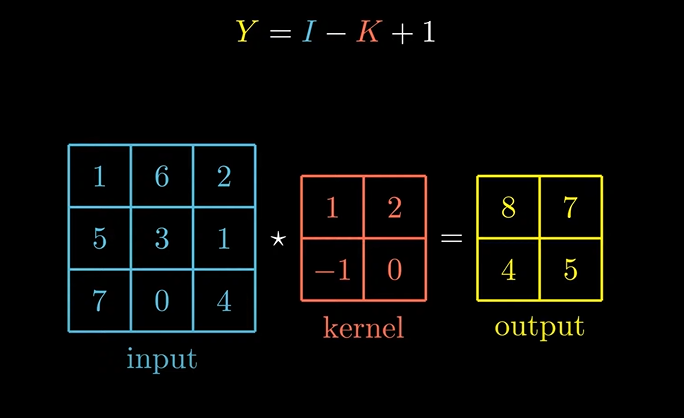

-Phân biệt Convolution là gì:

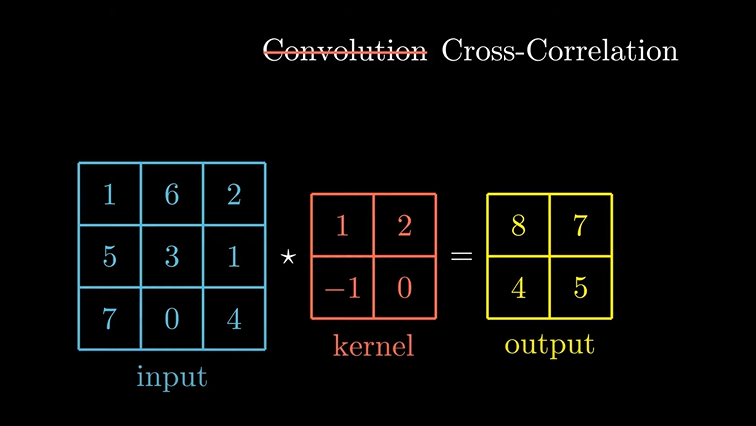

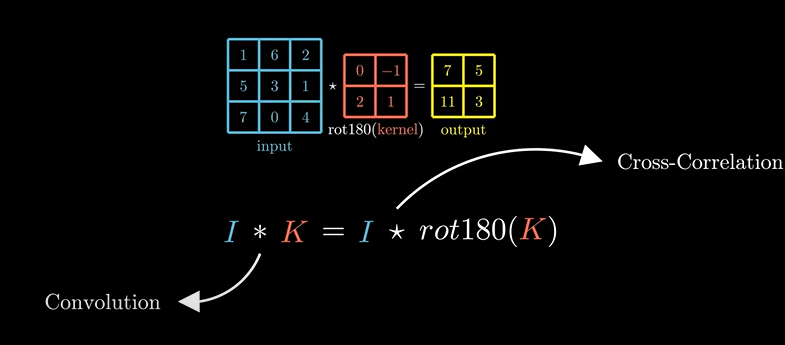

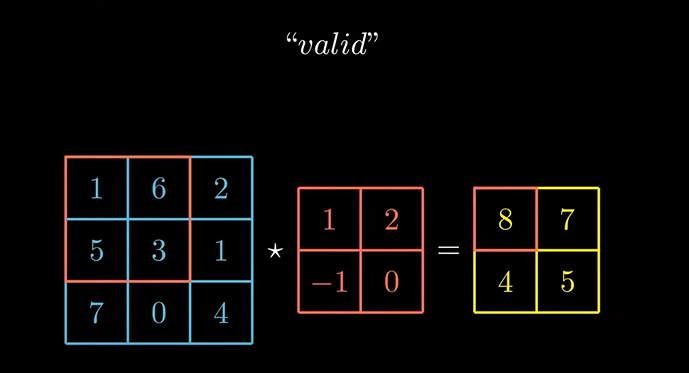

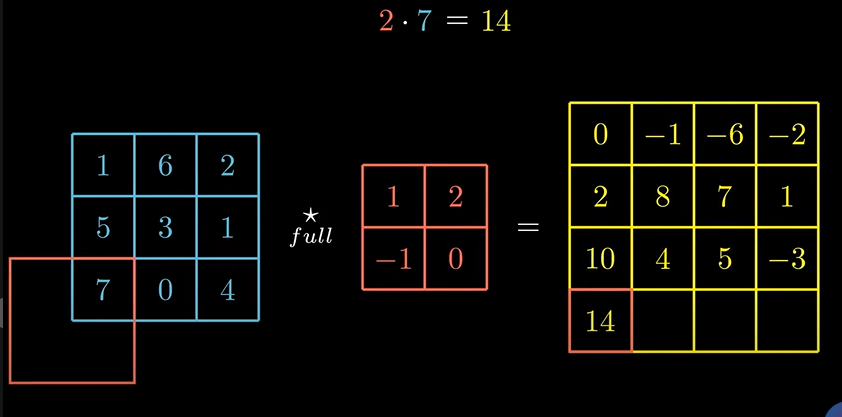

-Cách Convolution Lyaer hoạt động:

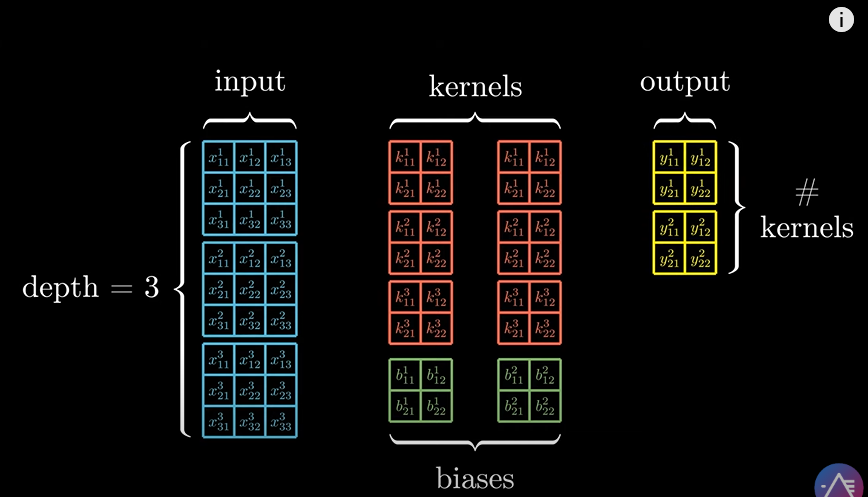
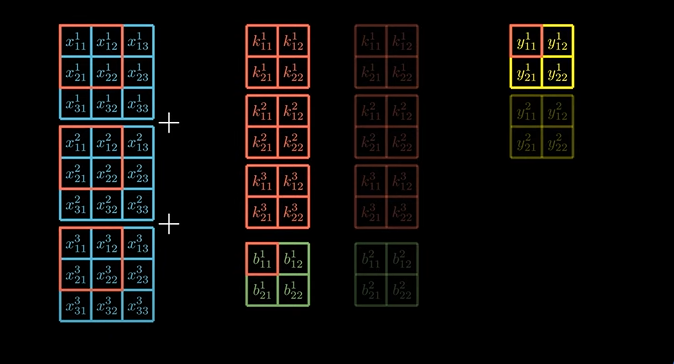
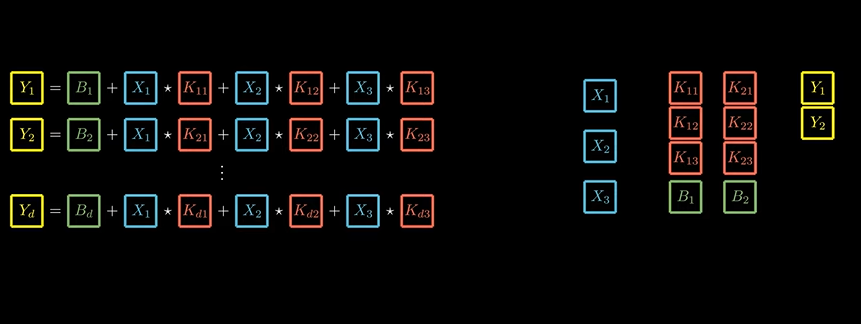
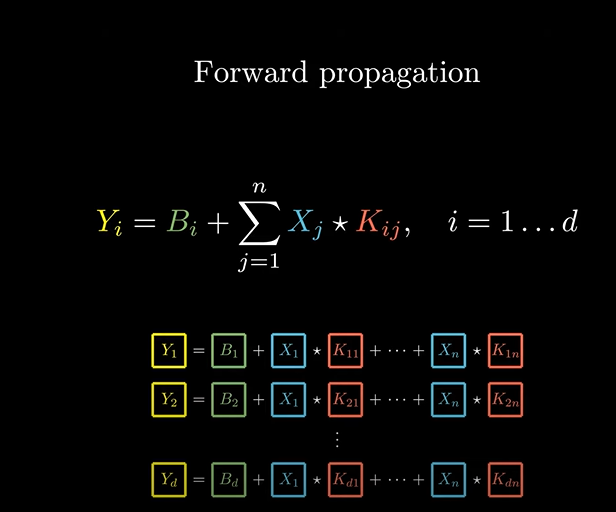
- VD ta có 1 phép tử như sau thì ta sẽ có công thức này:
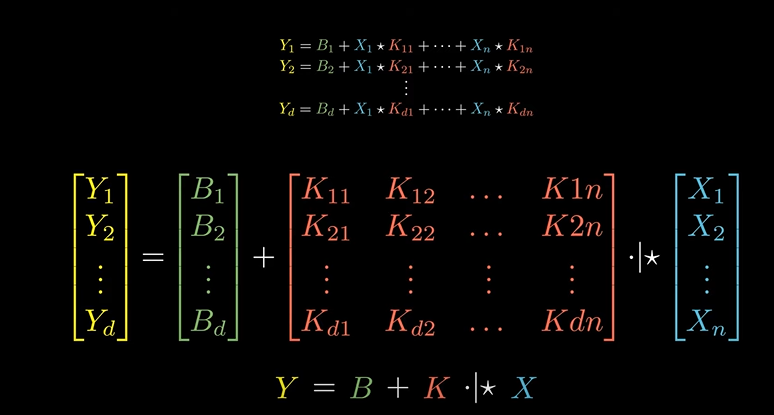



Lớp Covolution nói cách khác là sự tổng quát của Dense layer

- Forward của Convolution dùng đển check predict với label:

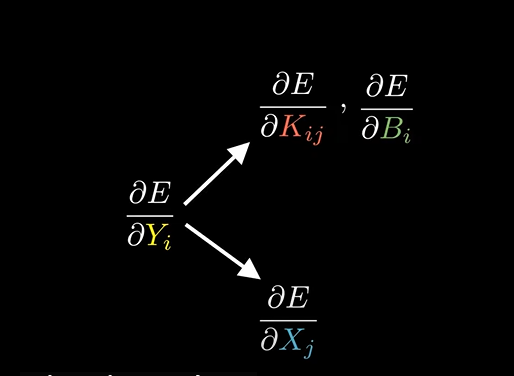

- Tính dE/d(Kij) trước:

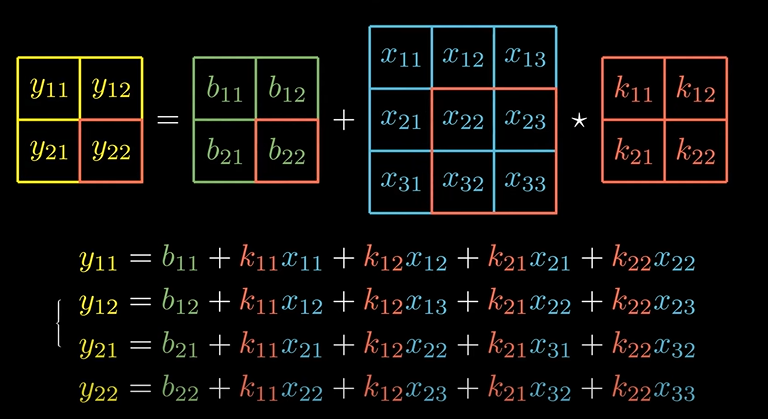
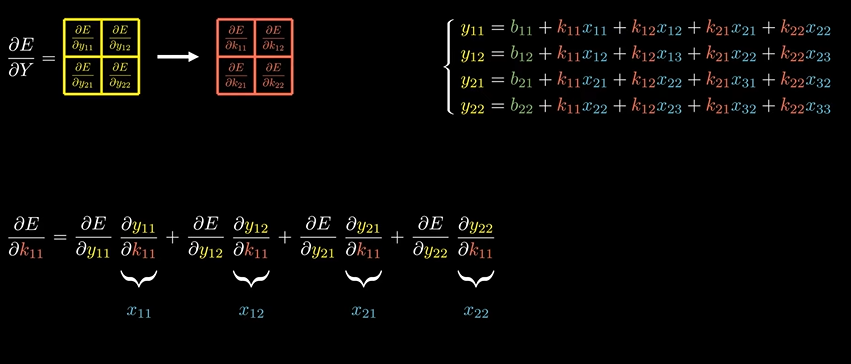

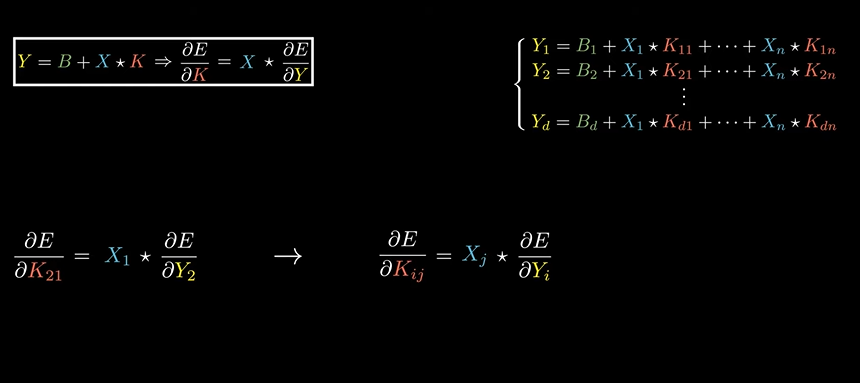

- Tính dE/dB:

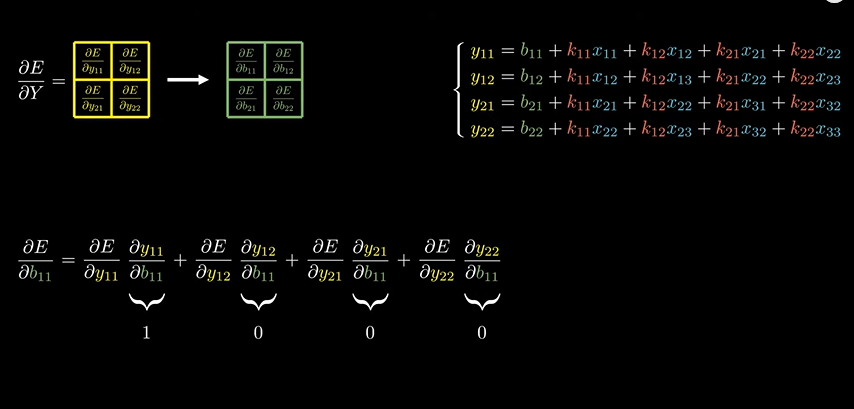

- TÍnh dE/dX:

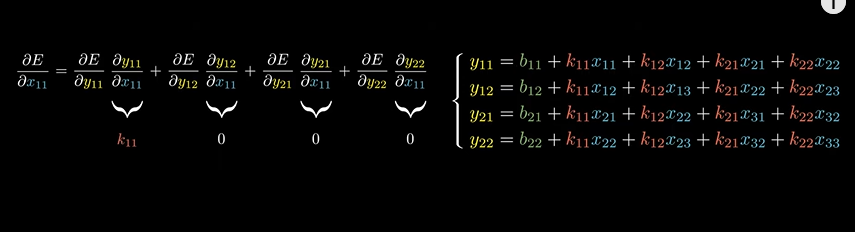


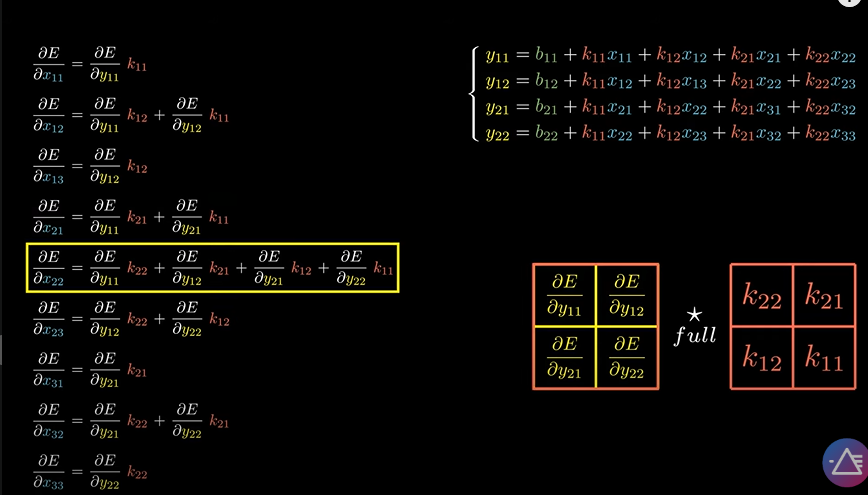

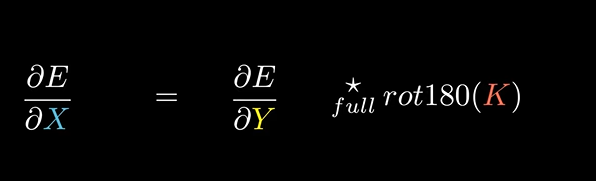

- Tổng hợp lại :

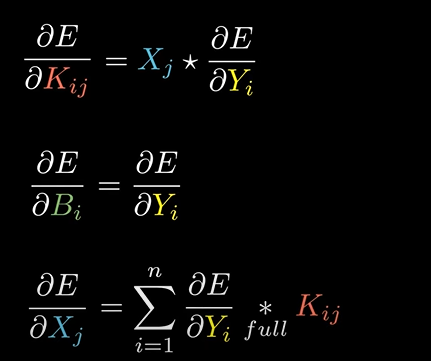

In [ ]:
class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):   #input_shape là 1 tuplet chứa chiều sâu , chiều cao , chiều rộng của input . Kernel_size là con số đại diện cho kích thước của mỗi ma trận bên trong mỗi hạt nhân(VD là 3 thì là 3*3) dept là số hạt nhân mà chúng ta muốn muốn đầu ra
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)

    def forward(self, input):
        self.input = input
        self.output = np.copy(self.biases)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
        return self.output

    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)

        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid") # TÍnh dE/d(Kij)
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full") # tính dE/dXj

        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * output_gradient
        return input_gradient

Khối reshape là cần thiết vì đầu ra của convolution layer là 1 khối 3D chuyển thành đầu ra là 2D

In [ ]:
class Reshape(Layer): # Dc kế thừa từ layer cơ bản
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape

    def forward(self, input):
        return np.reshape(input, self.output_shape) # Reshape lại input dầu ra

    def backward(self, output_gradient, learning_rate):
        return np.reshape(output_gradient, self.input_shape)#reshape lại output dầu ra thành input đầu vào

In [ ]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = True):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        if verbose:
            y_pre_train = prediction(network, x_train)
            accuracy_on_train=get_accuracy(y_pre_train, y_train)
            print(f"{e + 1}/{epochs}, error={error},train accuracy= {accuracy_on_train}")




In [ ]:
def prediction(network,X):
  flag = 0
  for x in X:
    output1 = predict(network, x)
    if flag ==0:
      output = np.array(np.argmax(output1))
      flag = 1
    else:
      output=np.hstack((output,np.argmax(output1)))
  return output
  #print(output)

In [ ]:
def get_accuracy(predictions, Y):
    #print(predictions, Y)
    y = np.argmax(Y,axis =1).reshape(Y.shape[0])
    #print(predictions.shape)
    return np.sum(predictions == y) / y.size

Không sử dụng Lớp Convolution layer cho tập dataset MNIST


In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

In [ ]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = True):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        if verbose:
            y_pre_train = prediction(network, x_train)
            accuracy_on_train=get_accuracy(y_pre_train, y_train)
            print(f"{e + 1}/{epochs}, error={error},train accuracy= {accuracy_on_train}")




In [ ]:
def preprocess_data(x, y):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28,1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10,1)
    return x, y

def plot_random_images(x,y,p = None):
  #x = x.T
  indices = np.random.choice(range(x.shape[0]) ,10) #Lấy bất kì 10 tấm hình
  y = np.argmax(y,axis =1)
  if p is None:
    p =y
  plt.figure(figsize = (10,5))
  for i , index in enumerate(indices):
    plt.subplot(2,5,i+1)
    plt.imshow(x[index].reshape((28,28)), cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    if y[index] == p[index]:
      col = 'g'
    else:
      col = 'r'
    plt.xlabel(str(p[index]), color = col)
  return plt


In [ ]:
# load MNIST from server, limit to 100 images per class since we're not training on GPU
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)




11501568/11490434 [==============================] - 0s 0us/step


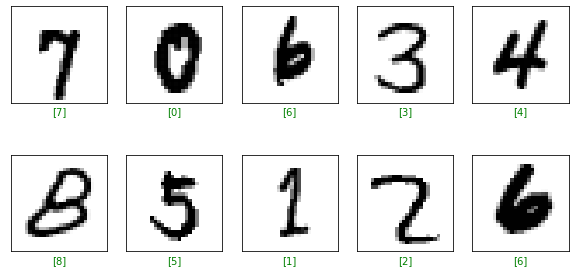

In [ ]:
plot_random_images(x_train, y_train).show()

In [ ]:
# neural network
network = [
    Dense(28 * 28, 64),
    Sigmoid(),
    Dense(64, 32),
    Tanh(),
    Dense(32, 10),
    Softmax(),
]

# train
train(
    network,
   mse, mse_prime,
    x_train,
    y_train,
    epochs=10,
    learning_rate=0.3
)

1/10, error=0.03484779429742137,train accuracy= 0.8671
2/10, error=0.017457407709967912,train accuracy= 0.9021166666666667
3/10, error=0.013883386833202246,train accuracy= 0.92255
4/10, error=0.011845389223248837,train accuracy= 0.9303333333333333
5/10, error=0.010471506391779267,train accuracy= 0.9359
6/10, error=0.009562723096089583,train accuracy= 0.9405833333333333
7/10, error=0.00882868095087638,train accuracy= 0.9498
8/10, error=0.008178671864933346,train accuracy= 0.9491333333333334
9/10, error=0.007688042181897576,train accuracy= 0.9544333333333334
10/10, error=0.007203312402008456,train accuracy= 0.9573166666666667


In [ ]:
y_pre_test = prediction(network, x_test)

In [ ]:
get_accuracy(y_pre_test,y_test)

0.9374

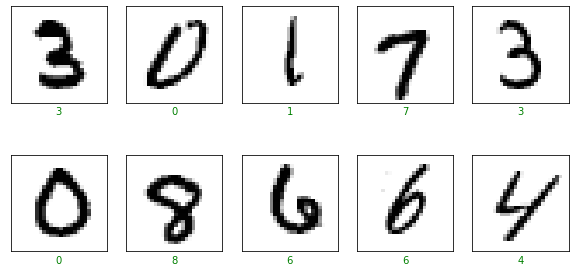

In [ ]:
plot_random_images(x_test,y_test,y_pre_test).show()

Sử dụng Lớp Convolution layer cho tập dataset MNIST


In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

In [ ]:
def preprocess_data(x, y):
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), 10, 1)
    return x, y

def plot_random_images(x,y,p = None):
  #x = x.T
  indices = np.random.choice(range(x.shape[0]) ,10) #Lấy bất kì 10 tấm hình
  y = np.argmax(y,axis =1)
  if p is None:
    p =y
  plt.figure(figsize = (10,5))
  for i , index in enumerate(indices):
    plt.subplot(2,5,i+1)
    plt.imshow(x[index].reshape((28,28)), cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    if y[index] == p[index]:
      col = 'g'
    else:
      col = 'r'
    plt.xlabel(str(p[index]), color = col)
  return plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

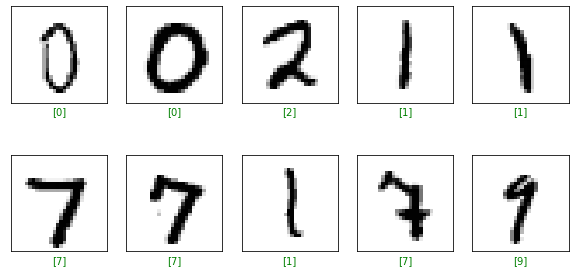

In [ ]:
plot_random_images(x_train, y_train).show()

In [ ]:
# neural network
network = [
    Convolutional((1, 28, 28), 3, 5),
    Tanh(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Tanh(),
    Dense(100, 10),
    Softmax()
]

In [ ]:
# train
train(
    network,
    mse,
    mse_prime,
    x_train,
    y_train,
    epochs=10,
    learning_rate=0.1
)

1/10, error=0.07399361109433489,train accuracy= 0.6027333333333333
2/10, error=0.054652614167711736,train accuracy= 0.6234
3/10, error=0.05040996090823966,train accuracy= 0.67305
4/10, error=0.038391892913313845,train accuracy= 0.772
5/10, error=0.03300674271647488,train accuracy= 0.76325
6/10, error=0.030741678404951567,train accuracy= 0.7792833333333333
7/10, error=0.029692794134092333,train accuracy= 0.7806333333333333
8/10, error=0.028687897025940733,train accuracy= 0.80145
9/10, error=0.02841185452952928,train accuracy= 0.8037333333333333
10/10, error=0.02764279697177215,train accuracy= 0.80585


In [ ]:
y_pre_test = prediction(network, x_test)

In [ ]:
get_accuracy(y_pre_test,y_test)

0.803

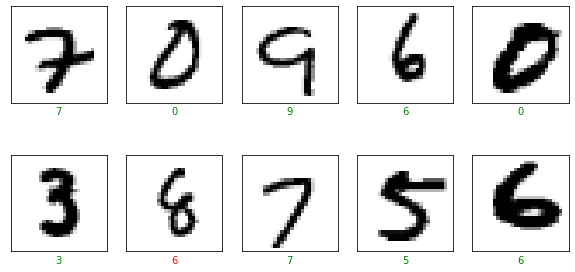

In [ ]:
plot_random_images(x_test,y_test,y_pre_test).show()